# Processing

In [1]:
# import libraries

import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
def clustering(indicator: pd.DataFrame, n_clusters: int = 5) -> pd.DataFrame:
    '''
    Replaces the indicator numeric values with labels using K-means clustering
    '''
    labels = ['very low', 'low', 'moderate', 'high', 'very high']
    for column in indicator.columns:
        if indicator[column].dtype in ['float64', 'int64']:
            column_data = indicator[column].dropna().values.reshape(-1, 1)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            cluster_labels = kmeans.fit_predict(column_data)
            cluster_centroids = kmeans.cluster_centers_.flatten()
            sorted_indices = np.argsort(cluster_centroids)
            label_mapping = {sorted_indices[i]: labels[i] for i in range(n_clusters)}
            cluster_series = pd.Series(cluster_labels, index=indicator[column].dropna().index)
            indicator[column] = indicator[column].astype('object')
            indicator.loc[cluster_series.index, column] = cluster_series.map(label_mapping)
    return indicator


In [3]:
def visualize_label_distribution(label_df : pd.DataFrame):
    '''
    Plots the distribution of the indicator labeled values
    '''
    label_order = ['very low', 'low', 'moderate', 'high', 'very high']
    categorical_columns = label_df.select_dtypes(include=['object']).columns
    categorical_columns = categorical_columns[categorical_columns != 'municipality']
    ncols = 3
    nrows = int(np.ceil(len(categorical_columns) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 2.5 * nrows))
    axes = axes.flatten()
    for i, column in enumerate(categorical_columns):
        label_counts = label_df[column].value_counts()
        label_counts = label_counts.reindex(label_order).fillna(0)
        sns.barplot(x=label_counts.index, y=label_counts.values, ax=axes[i], palette='viridis', hue=None, legend=False)
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
# data folder

data_folder = '../../data/demographics'

### Mortality

In [5]:
# cluster values

mortality = pd.read_csv(f"{data_folder}/raw/mortalidade.csv")

mortality = mortality.rename(columns={
    'município': 'municipality',
    'mort_alcool': 'alcohol-sensitive mortality',
    'mort_cs': 'mortality from healthcare-sensitive causes',
    'mort_diabetes': 'diabetes mortality',
    'mort_pobreza': 'poverty-sensitive mortality',
    'mort_prev': 'mortality from causes sensitive to prevention',
    'mort_suicidio': 'mortality from suicide and self-inflicted injuries',
    'mort_tabaco': 'mortality sensitive to tobacco consumption',
    'mort_tumores': 'mortality from malignant tumors' 
})
mortality.replace(-1, np.nan, inplace=True)

mortality = clustering(mortality)

mortality.head()

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,municipality,alcohol-sensitive mortality,mortality from healthcare-sensitive causes,diabetes mortality,poverty-sensitive mortality,mortality from causes sensitive to prevention,mortality from suicide and self-inflicted injuries,mortality sensitive to tobacco consumption,mortality from malignant tumors
0,Alfândega da Fé,moderate,low,low,low,moderate,low,very low,very low
1,Amares,very low,very low,very low,low,moderate,very low,low,very low
2,Braga,very low,very low,very low,very low,very low,very low,very low,very low
3,Bragança,moderate,very low,very low,low,low,moderate,very low,low
4,Gondomar,very low,very low,very low,low,low,very low,very low,moderate


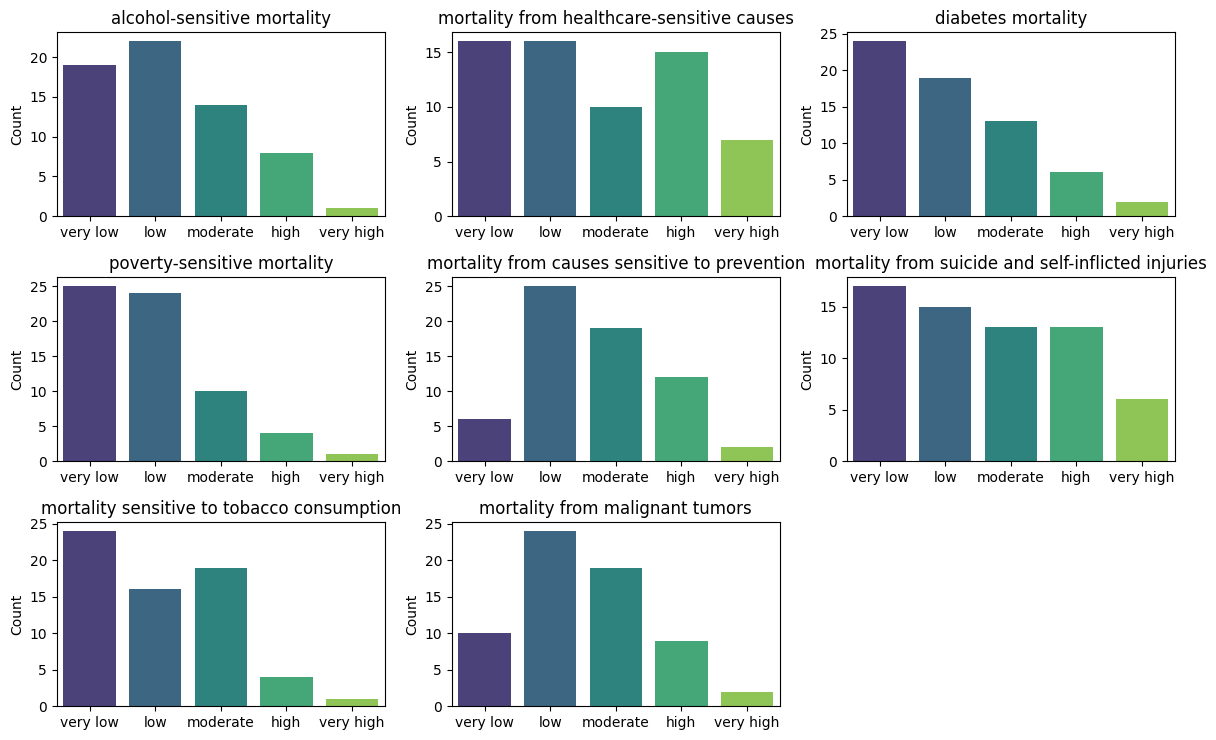

In [6]:
# mortality level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(mortality)

In [7]:
# save processed data

mortality.to_csv(f"{data_folder}/processed/mortality.csv", index=False)

### Morbidity

In [8]:
# cluster values

morbidity = pd.read_csv(f"{data_folder}/raw/morbilidade.csv")

morbidity = morbidity.rename(columns={
    'município': 'municipality',
    'diabetes': 'diabetes',
    'hipertensao': 'high blood pressure',
    'int_dm': 'hospitalizations for mental illness',
    'peso_adultos': 'obesity in population aged 18 and over',
    'peso_criancas': 'obesity in children and adolescents'
})
morbidity.replace(-1, np.nan, inplace=True)

morbidity = clustering(morbidity)

morbidity.head()

,municipality,diabetes,high blood pressure,hospitalizations for mental illness,obesity in population aged 18 and over,obesity in children and adolescents
0,Alfândega da Fé,high,high,very high,very low,very low
1,Amares,low,moderate,low,low,moderate
2,Braga,very low,low,low,very low,moderate
3,Bragança,low,moderate,very high,very low,very low
4,Gondomar,moderate,moderate,moderate,low,moderate


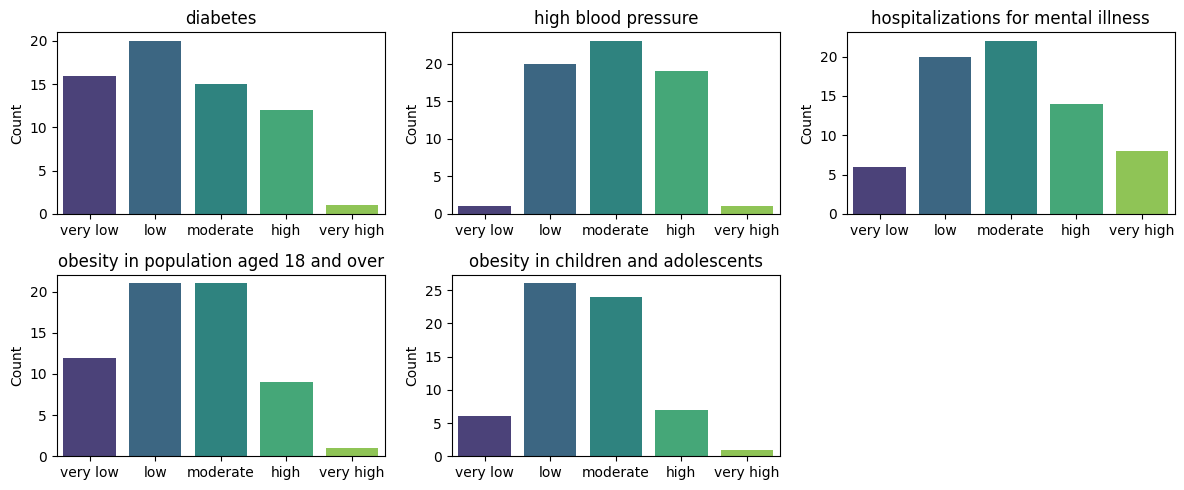

In [9]:
# morbidity level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(morbidity)

In [10]:
# save processed data

morbidity.to_csv(f"{data_folder}/processed/morbidity.csv", index=False)

### Healthcare

In [11]:
# cluster values

healthcare = pd.read_csv(f"{data_folder}/raw/cuidados-saude.csv")

healthcare = healthcare.rename(columns={
    'município': 'municipality',
    'ag_cs': 'distance to primary health care',
    'ag_h': 'distance to public hospitals',
    'consult_mgf': 'family medicine consultations',
    'enf_cs': 'nurses in primary health care',
    'med_cs': 'doctors in primary health care',
    'pop_s_medico': 'users without a family doctor',
    'vacinacao': 'vaccination coverage'
})
healthcare.replace(-1, np.nan, inplace=True)

healthcare = clustering(healthcare)

healthcare.head()

,municipality,distance to primary health care,distance to public hospitals,family medicine consultations,nurses in primary health care,doctors in primary health care,users without a family doctor,vaccination coverage
0,Alfândega da Fé,high,moderate,high,high,moderate,moderate,high
1,Amares,moderate,low,low,very low,low,low,high
2,Braga,moderate,very low,low,very low,low,very low,moderate
3,Bragança,high,very low,low,low,moderate,very low,moderate
4,Gondomar,very low,low,high,very low,low,very low,high


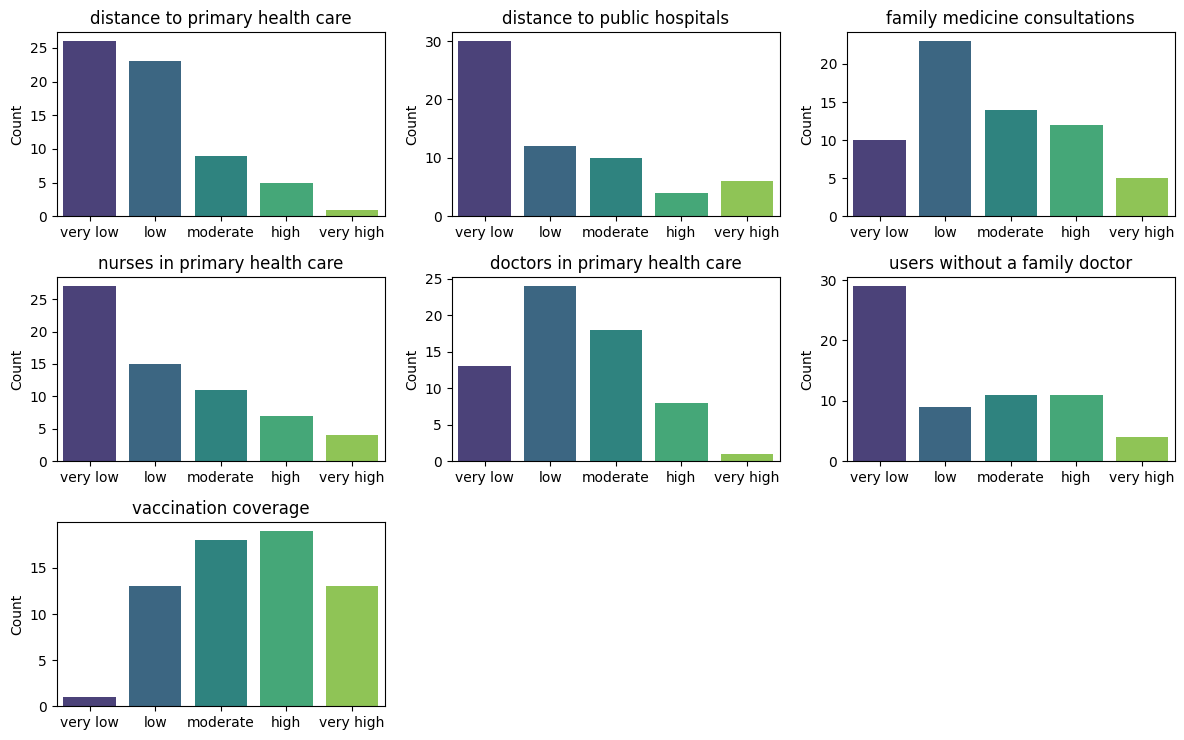

In [12]:
# healthcare level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(healthcare)

In [13]:
# save processed data

healthcare.to_csv(f"{data_folder}/processed/healthcare.csv", index=False)

### Lifestyle

In [14]:
# cluster values

lifestyle = pd.read_csv(f"{data_folder}/raw/estilos-vida.csv")

lifestyle = lifestyle.rename(columns={
    'município': 'municipality',
    'alcool': 'drinkers',
    'drogas': 'problematic drug use',
    'pop_activ_fisica': 'population aged 15 and over who do not exercise',
    'tabaco': 'smokers aged 15 and over',
})
lifestyle.replace(-1, np.nan, inplace=True)

lifestyle = clustering(lifestyle)

lifestyle.head()

,municipality,drinkers,problematic drug use,population aged 15 and over who do not exercise,smokers aged 15 and over
0,Alfândega da Fé,low,very low,moderate,very low
1,Amares,high,very low,high,low
2,Braga,moderate,moderate,very low,low
3,Bragança,low,very low,NaN,low
4,Gondomar,high,moderate,low,moderate


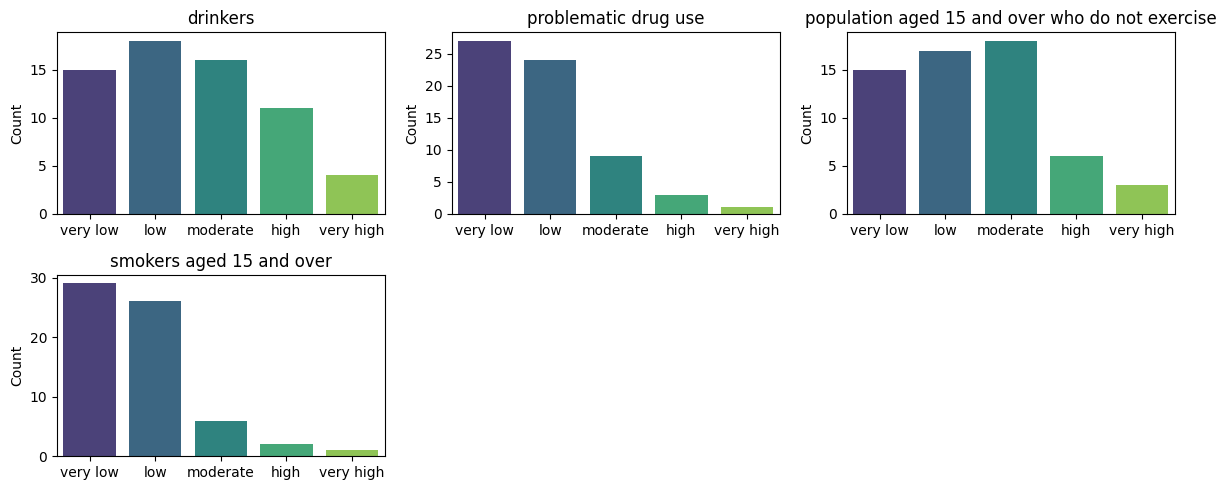

In [15]:
# lifestyle level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(lifestyle)

In [16]:
# save processed data

lifestyle.to_csv(f"{data_folder}/processed/lifestyle.csv", index=False)

### Education

In [17]:
# cluster values

education = pd.read_csv(f"{data_folder}/raw/educacao.csv")

education = education.rename(columns={
    'município': 'municipality',
    'abandono_esc': 'school dropout rate',
    'analf': 'illiteracy rate',
    'esc_obrig': 'population with compulsory schooling',
    'pop_ens_sup': 'population with higher education'
})
education.replace(-1, np.nan, inplace=True)

education = clustering(education)

education.head()

,municipality,school dropout rate,illiteracy rate,population with compulsory schooling,population with higher education
0,Alfândega da Fé,moderate,high,very low,very low
1,Amares,very low,low,low,low
2,Braga,very low,very low,low,high
3,Bragança,very low,moderate,very low,high
4,Gondomar,low,very low,moderate,low


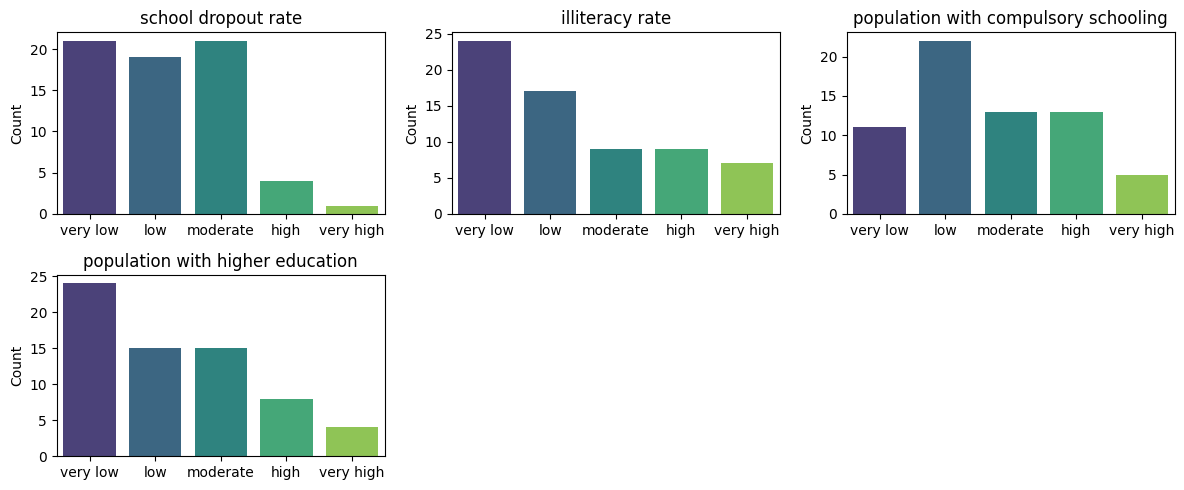

In [18]:
# education level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(education)

In [19]:
# save processed data

education.to_csv(f"{data_folder}/processed/education.csv", index=False)

### Socioeconomic

In [20]:
# cluster values

socioeconomic = pd.read_csv(f"{data_folder}/raw/economico-social.csv")

socioeconomic = socioeconomic.rename(columns={
    'município': 'municipality',
    'abs_eleicoes': 'abstention in local elections',
    'desemp_j': 'youth unemployment rate',
    'desemp_ld': 'long-term unemployment rate',
    'id_idosos': 'elderly dependency',
    'idosos_sos': 'elderly population living alone',
    'i_env': 'aging index',
    'nem_nem': 'population aged between 15 and 34 who neither work nor study',
    'rendimento': 'monthly household income',
    'rsi': 'beneficiaries of social integration income'
})
socioeconomic.replace(-1, np.nan, inplace=True)

socioeconomic = clustering(socioeconomic)

socioeconomic.head()

,municipality,abstention in local elections,youth unemployment rate,long-term unemployment rate,elderly dependency,elderly population living alone,aging index,population aged between 15 and 34 who neither work nor study,monthly household income,beneficiaries of social integration income
0,Alfândega da Fé,low,high,very high,very high,moderate,very high,very high,low,low
1,Amares,moderate,low,low,low,very low,low,low,high,very low
2,Braga,very low,low,low,low,very low,low,very low,high,very low
3,Bragança,high,low,low,high,low,moderate,low,very high,very low
4,Gondomar,low,low,low,low,very low,low,high,moderate,low


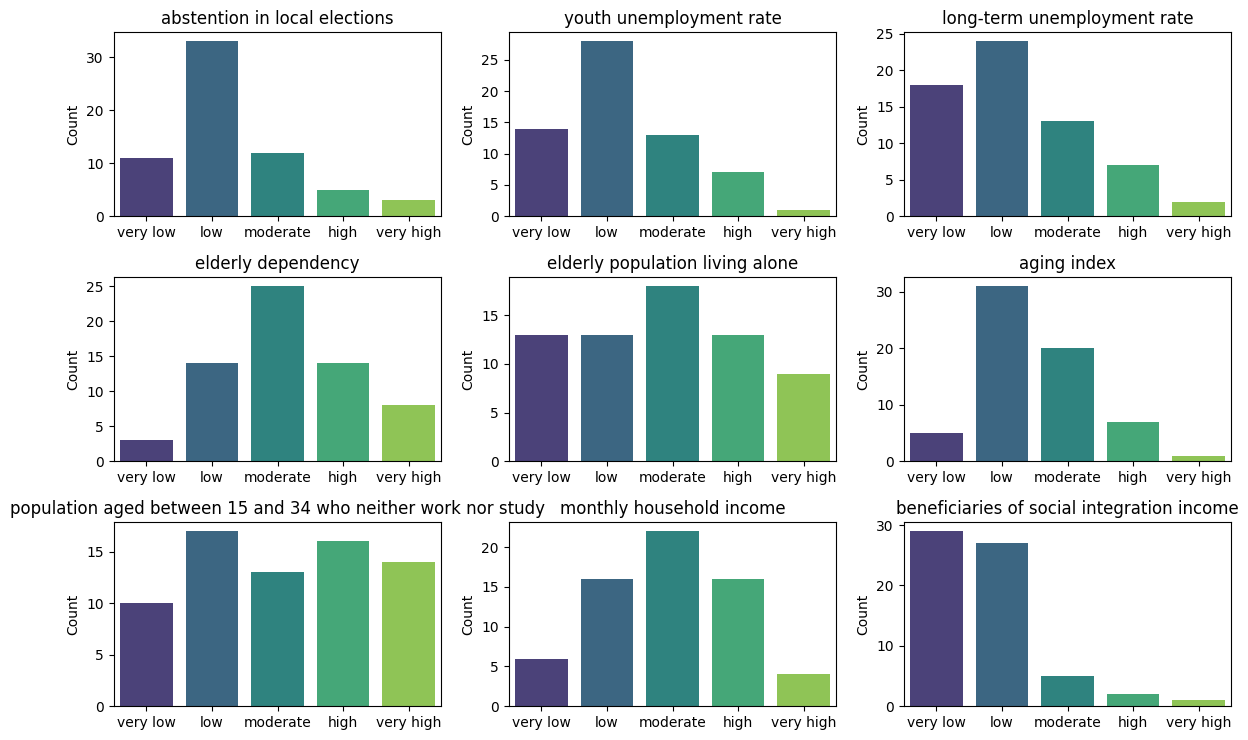

In [21]:
# socioeconomic level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(socioeconomic)

In [22]:
# save processed data

socioeconomic.to_csv(f"{data_folder}/processed/socioeconomic.csv", index=False)

### Environment

In [8]:
# cluster values

environment = pd.read_csv(f"{data_folder}/raw/ambiente-fisico.csv")

environment = environment.rename(columns={
    'município': 'municipality',
    'a_evu': 'urban green space',
    'agua_seg': 'safe water',
    'ag_verde': 'distance to green spaces',
    'mp_tparticular': 'population using cars or motorcycles daily',
    'mp_tpublico': 'population using public transport daily',
    'p_ruido': 'harmful noise levels'
})
environment.replace(-1, np.nan, inplace=True)

environment = clustering(environment)

environment.head()

,municipality,urban green space,safe water,distance to green spaces,population using cars or motorcycles daily,population using public transport daily,harmful noise levels
0,Alfândega da Fé,moderate,low,moderate,high,very low,very low
1,Amares,very low,low,low,very high,moderate,very low
2,Braga,low,very high,very low,high,moderate,low
3,Bragança,high,moderate,low,very high,very low,NaN
4,Gondomar,very low,very high,very low,high,high,low


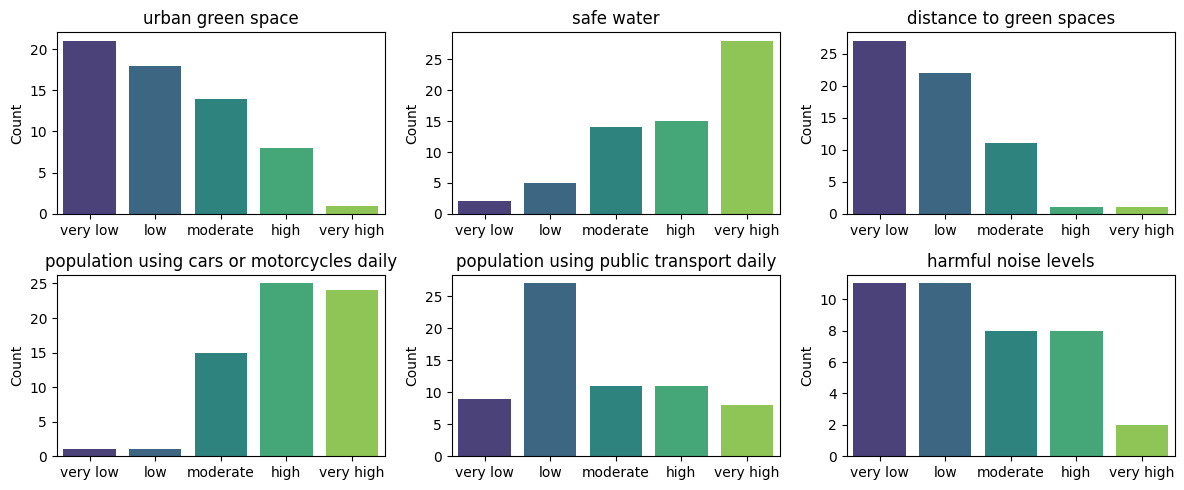

In [6]:
# environment level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(environment)

In [7]:
# save processed data

environment.to_csv(f"{data_folder}/processed/environment.csv", index=False)

### Infrastructure

In [26]:
# cluster values

infrastructure = pd.read_csv(f"{data_folder}/raw/ambiente-construido.csv")

infrastructure = infrastructure.rename(columns={
    'município': 'municipality',
    'aloj_aquec': 'accommodation without heating',
    'aloj_humid': 'accommodation with humidity problems',
    'aloj_sobre': 'overcrowded accommodation',
    'aloj_wc': 'unsanitary housing',
    'cap_creche': 'social response capacity for children',
    'cap_idosos': 'social response capacity for seniors',
    'edif_rodas': 'buildings without wheelchair accessibility',
})
infrastructure.replace(-1, np.nan, inplace=True)

infrastructure = clustering(infrastructure)

infrastructure.head()

,municipality,accommodation without heating,accommodation with humidity problems,overcrowded accommodation,unsanitary housing,social response capacity for children,social response capacity for seniors,buildings without wheelchair accessibility
0,Alfândega da Fé,very low,low,very low,low,moderate,moderate,high
1,Amares,very low,low,low,very low,very low,very low,low
2,Braga,very low,moderate,low,very low,moderate,very low,moderate
3,Bragança,NaN,NaN,very low,low,high,moderate,high
4,Gondomar,moderate,moderate,moderate,very low,very low,very low,high


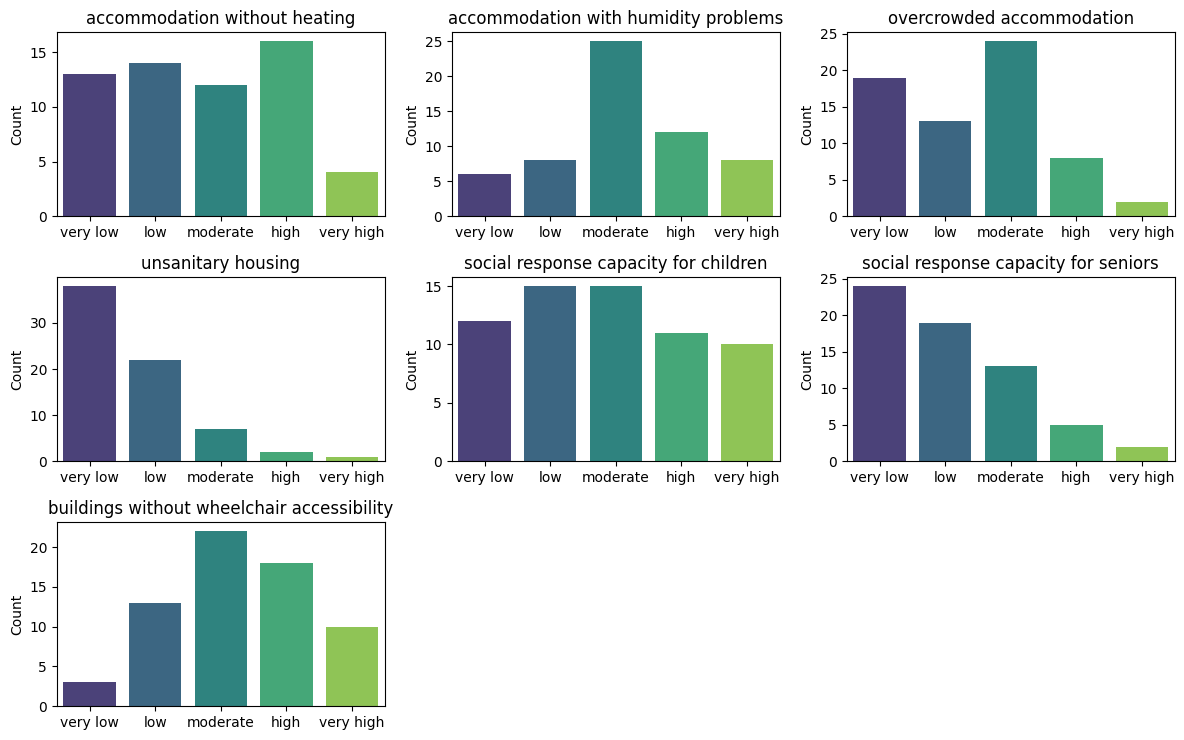

In [27]:
# infrastructure level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(infrastructure)

In [28]:
# save processed data

infrastructure.to_csv(f"{data_folder}/processed/infrastructure.csv", index=False)

### Security

In [29]:
# cluster values

security = pd.read_csv(f"{data_folder}/raw/seguranca.csv")

security = security.rename(columns={
    'município': 'municipality',
    'acidentes_vitimas': 'road accidents with victims',
    'crimes_criancas': 'violence against children',
    'violencia_domestica': 'domestic violence'
})
security.replace(-1, np.nan, inplace=True)

security = clustering(security)

security.head()

,municipality,road accidents with victims,violence against children,domestic violence
0,Alfândega da Fé,low,very low,moderate
1,Amares,moderate,high,very high
2,Braga,low,moderate,moderate
3,Bragança,low,very low,moderate
4,Gondomar,very low,moderate,high


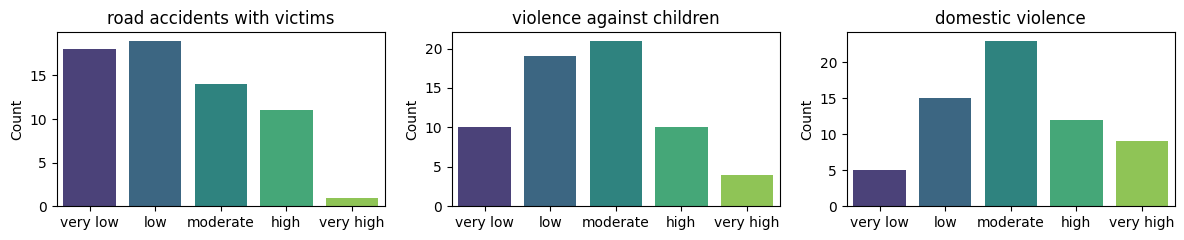

In [30]:
# security level distributions

warnings.filterwarnings("ignore", category=FutureWarning)
visualize_label_distribution(security)

In [31]:
# save processed data

security.to_csv(f"{data_folder}/processed/security.csv", index=False)